In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [3]:
comments = pd.read_csv("/kaggle/input/instgram/comments.csv")
follows = pd.read_csv("/kaggle/input/instgram/follows.csv")
likes = pd.read_csv("/kaggle/input/instgram/likes.csv")
photo_tags = pd.read_csv("/kaggle/input/instgram/photo_tags.csv")
photos = pd.read_csv("/kaggle/input/instgram/photos.csv")
tags = pd.read_csv("/kaggle/input/instgram/tags.csv")
users = pd.read_csv("/kaggle/input/instgram/users.csv")

In [4]:
for df in [comments, follows, likes, photo_tags, photos, tags, users]:
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')


In [5]:
print("Likes Columns:", likes.columns.tolist())
print("Comments Columns:", comments.columns.tolist())


Likes Columns: ['user', 'photo', 'created_time', 'following_or_not', 'like_type']
Comments Columns: ['id', 'comment', 'user__id', 'photo_id', 'created_timestamp', 'posted_date', 'emoji_used', 'hashtags_used_count']


In [7]:
print(comments.columns.tolist())


['id', 'comment', 'user__id', 'photo_id', 'created_timestamp', 'posted_date', 'emoji_used', 'hashtags_used_count']


In [10]:
active_users = pd.concat([
    likes['user'],
    comments['user__id']
]).value_counts().head(10)


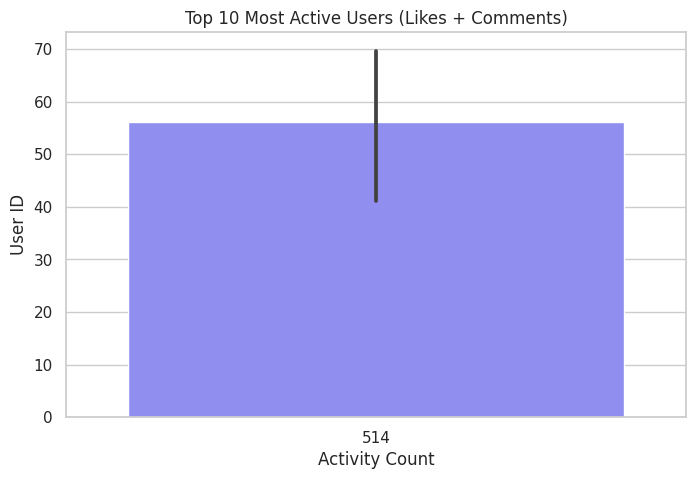

In [11]:
active_users = pd.concat([
    likes['user'],
    comments['user__id']
]).value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=active_users.values, y=active_users.index, palette="cool")
plt.title("Top 10 Most Active Users (Likes + Comments)")
plt.xlabel("Activity Count")
plt.ylabel("User ID")
plt.show()


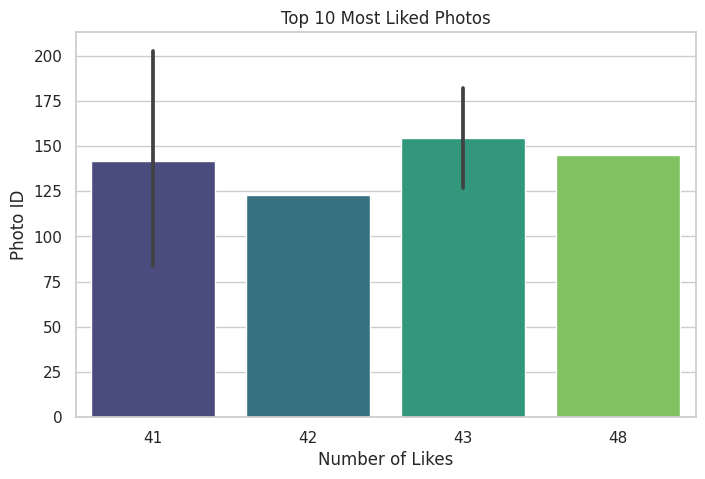

In [12]:
top_photos = likes['photo'].value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_photos.values, y=top_photos.index, palette="viridis")
plt.title("Top 10 Most Liked Photos")
plt.xlabel("Number of Likes")
plt.ylabel("Photo ID")
plt.show()


In [14]:
print(tags.columns.tolist())


['id', 'tag_text', 'created_time', 'location']


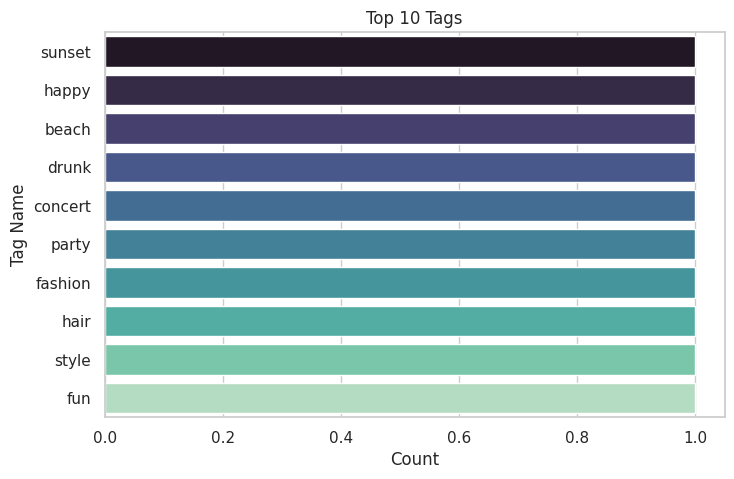

In [15]:
top_tags = tags['tag_text'].value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_tags.values, y=top_tags.index, palette="mako")
plt.title("Top 10 Tags")
plt.xlabel("Count")
plt.ylabel("Tag Name")
plt.show()


In [17]:
print(photos.columns.tolist())


['id', 'image_link', 'user_id', 'created_dat', 'insta_filter_used', 'photo_type']


In [20]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


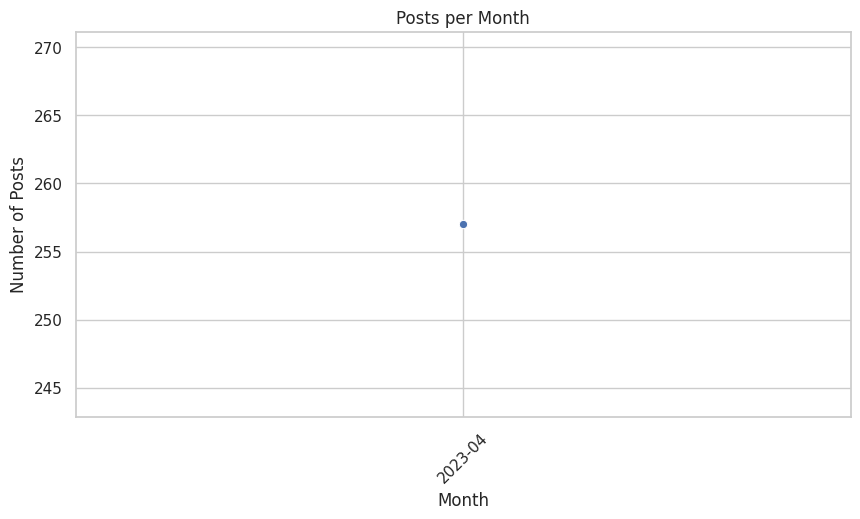

In [21]:
photos['created_dat'] = pd.to_datetime(photos['created_dat'], dayfirst=True, errors='coerce')
photos['month'] = photos['created_dat'].dt.to_period('M')

posts_per_month = photos['month'].value_counts().sort_index()

plt.figure(figsize=(10,5))
sns.lineplot(x=posts_per_month.index.astype(str), y=posts_per_month.values, marker='o')
plt.xticks(rotation=45)
plt.title("Posts per Month")
plt.xlabel("Month")
plt.ylabel("Number of Posts")
plt.show()


In [22]:
# Check column names first
print(follows.columns.tolist())


['follower', 'followee', 'created_time', 'is_follower_active', 'followee_acc_status']


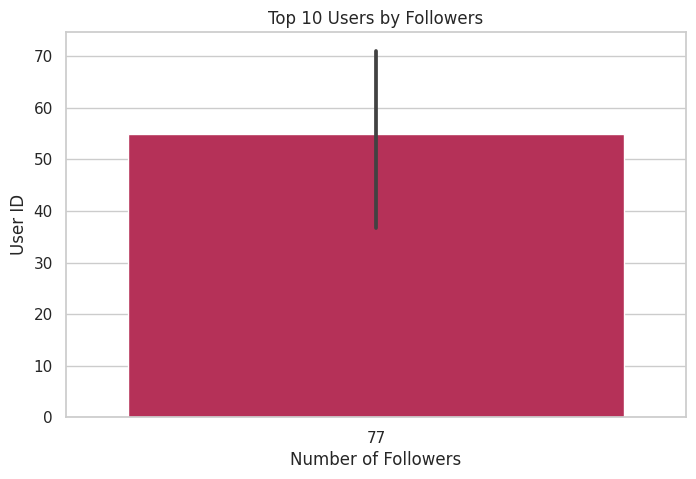

In [23]:
# Top 10 users with the most followers
top_followed_users = follows['followee'].value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_followed_users.values, y=top_followed_users.index, palette="rocket")
plt.title("Top 10 Users by Followers")
plt.xlabel("Number of Followers")
plt.ylabel("User ID")
plt.show()
